In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import linalg
from scipy.sparse import diags

In [3]:
!pip install jovian --upgrade --quiet

In [4]:
import jovian

Let $y = y(x)$ be a function of x. 
<br>
Then we know from taylor's series: 
<br>
<br>
\begin{equation}
y(x+h) = y(x) + hy'(x) + h^2y''(x) + \cdots \\
y(x-h) = y(x) - hy'(x) + h^2y''(x) - \cdots
\end{equation}

Substracting these two we get:
$$y(x+h)-y(x-h)=2hy'(x) + \mathcal{O}(h^3)$$
$$y'(x) = \frac{y(x+h)-y(x-h)}{2h} + \mathcal{O}(h^3)$$

>This is called **Central Difference Formula for diffrentiation.**

By adding these two, we get
$$y"(x) = \frac{y(x+h)+y(x-h)-2y(x)}{h^2} + \mathcal{O}(h^4)$$
<br>
In context of any diffrential equation, We are given boundries $x_0$ to $X_n$. <br> So we can simply devide it into N equal parts deffering by h. Let $x_i = x_0 + ih$ represent a point in this intevel. So $y_i = y(x_i)$. We can write the equation <br> <br>
$$y"(x) = \frac{y_{i+1} + y_{i-1} - 2y_{i}}{h^2}$$

We want to solve the boundry value problem

$$\frac{d^2 y}{dx^2} + 4y = 0$$
$$y(0) = -2 \quad y(\pi/4)=10$$

We can divide the intervel \[-2,10] in $N$ equal parts where every point is $h$ distance apart. For any point $i$ <br>
$$\frac{y(x+h)+y(x-h)-2y(x)}{h^2}+4y_i = 0$$
$$y_{i+1) + y_{i-1} + (4h^2-2)y_i=0$$
<br>
$$y_0 = -1 \quad \quad i =0$$
$$y_0 + (4h^2-2)y_1+y_2 =0$$
$$y_1 + (4h^2-2)y_2+y_3 =0$$
$$y_2 + (4h^2-2)y_3+y_4 =0$$
$$y_3 + (4h^2-2)y_4+y_5 =0$$
$$y_{n-2} + (4h^2-2)y_{n-1}+y_{n} =0$$
$$y_n = 10$$

In [5]:
pi = math.pi
xs = np.linspace(0, pi/4,100)
h = np.diff(xs)[0]
N = xs.size

In [6]:
d1 = np.ones(N-1)
d0 = (4*h**2-2)*np.ones(N)

M = diags([d1,d0,d1],[-1,0,1]).toarray()
M[0][0]=1
M[0][1]=0
M[-1][-1]=1
M[-1][-2] = 0

In [7]:
b = np.zeros(N)
b[0]=-2
b[-1]=10

In [8]:
b

array([-2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.])

In [9]:
ys = linalg.solve(M,b)
yth = -2*np.cos(2*xs)+10*np.sin(2*xs)

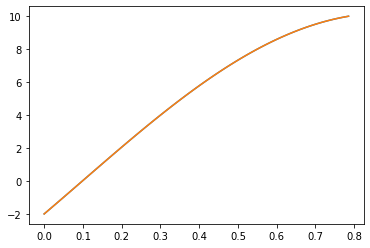

In [10]:
plt.plot(xs, ys)
plt.plot(xs, yth)
plt.show()

In [11]:
b

array([-2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.])

In [12]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "iashyam/finitediffrence" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/iashyam/finitediffrence


'https://jovian.ai/iashyam/finitediffrence'

# Solving PArtial Diffrential Equations 

Let's Say we want to solve a diffrential equation:

\begin{equation}
    \frac{\partial u}{\partial y} = 4 \frac{\partial^2 u}{\partial x^2}
\end{equation}

With initial conditions given <br>
$y(x,0) = 0$ <br>
$y(0,y) = 10$ <br>
$y(10,y) = 20$ <br>